# Universidad del Valle de Guatemala
# (CC3094) Security Data Science
# Laboratorio 2 - Detección de Spam

Miembros del equipo de trabajo:
- Yongbum Park (20117)
- Santiago Taracena (20017)

## Introducción

El fenómeno del SPAM, caracterizado por el envío masivo de mensajes no deseados, ya sea por correo electrónico o SMS, constituye una problemática persistente en el ámbito digital. Estos mensajes no solo resultan molestos para los usuarios, sino que también pueden representar una amenaza potencial al ser utilizados como vectores para la distribución de malware, fraudes (SCAM) o para perpetrar ataques de phishing. Por lo tanto, la detección eficiente de SPAM se convierte en un desafío crucial para garantizar la seguridad y privacidad de los usuarios en el mundo digital.

En este laboratorio, nos proponemos explorar técnicas de procesamiento de lenguaje natural (NLP) y métodos clásicos de representación numérica para abordar la detección de SPAM en mensajes de texto, específicamente en el contexto de los SMS. A través de la aplicación de estas técnicas, buscamos desarrollar modelos de clasificación capaces de distinguir entre mensajes legítimos y aquellos que constituyen SPAM, con el objetivo de proporcionar herramientas efectivas para mitigar esta problemática.

En la primera parte del laboratorio, nos enfocaremos en la ingeniería de características, donde aplicaremos diversas técnicas de preprocesamiento de texto, como la conversión de minúsculas, eliminación de acentos, expansión de contracciones y eliminación de palabras comunes (stop words), entre otras. Además, exploraremos la generación de características adicionales inspiradas en técnicas avanzadas de NLP usadas en la actualidad, con el fin de enriquecer la representación de los mensajes de texto y mejorar la capacidad de los modelos para detectar patrones asociados con el SPAM.

Posteriormente, en la segunda parte del laboratorio, implementaremos modelos de aprendizaje automático utilizando algoritmos clásicos de clasificación. Utilizaremos tanto el modelo de Bag of Words (BoG) para n = 1 y n = 2, como el modelo de TF-IDF (Term Frequency-Inverse Document Frequency) para representar numéricamente los mensajes de texto. Evaluaremos el rendimiento de cada modelo en términos de métricas como la precisión, el recall y el área bajo la curva ROC, con el objetivo de identificar el enfoque más efectivo para la detección de SPAM en SMS.

A través de este laboratorio, esperamos proporcionar una comprensión más profunda de las técnicas de procesamiento de lenguaje natural y su aplicación en la detección de SPAM, así como ofrecer herramientas prácticas para abordar esta problemática en el ámbito de la seguridad de datos. Otro objetivo considerablemente importante consiste en lograr representar textos de una longitud alta como los que se encuentran presentes en el dataset de forma eficiente y fácil de aplicar para el procedimiento en el que consiste entrenar un modelo de inteligencia artificial como los que se deben utilizar.

## Parte 1 - Ingeniería de Características

En la primera parte del laboratorio, que se centra en la ingeniería de características, es fundamental realizar una serie de pasos para preparar los datos de texto antes de entrenar cualquier modelo de clasificación. Estos pasos incluyen una serie de técnicas de preprocesamiento de lenguaje natural (NLP) destinadas a limpiar y mejorar la calidad de los datos. Una de las primeras acciones a tomar es la conversión de texto a minúsculas, lo que ayuda a garantizar la consistencia y facilita el procesamiento posterior al evitar redundancias en las palabras debido a diferencias de mayúsculas y minúsculas. Además, se debe considerar la eliminación de acentos, ya que algunos sistemas pueden interpretar las letras acentuadas como caracteres distintos, lo que puede dificultar la comparación y análisis de las palabras.

Otro aspecto importante en la ingeniería de características es la expansión de contracciones, donde las palabras abreviadas o contraídas se convierten en su forma completa. Por ejemplo, la palabra "can't" se expandiría a "cannot". Esto ayuda a asegurar que las palabras sean reconocidas correctamente y se capturen adecuadamente en la representación numérica del texto. Además, se debe considerar la eliminación de palabras comunes, conocidas como "stop words", que son palabras que no aportan un significado sustancial al texto y pueden ser ignoradas sin sacrificar la comprensión del mensaje.

Además de estas técnicas básicas de preprocesamiento, es importante explorar la generación de características adicionales inspiradas en técnicas avanzadas de NLP. Esto puede incluir la extracción de características como la longitud del mensaje, la frecuencia de palabras clave, la detección de emoticonos o signos de puntuación y la identificación de patrones lingüísticos específicos asociados con SPAM, como el uso excesivo de palabras promocionales o la presencia de enlaces URL. Al incorporar estas características adicionales, podemos enriquecer la representación de los mensajes de texto y mejorar la capacidad de los modelos para detectar patrones relevantes para la detección de SPAM en SMS.

### Exploración de datos y pre-procesamiento

En la fase de exploración de datos y preprocesamiento, es esencial realizar un análisis detallado de los datos disponibles antes de aplicar cualquier técnica de procesamiento de lenguaje natural (NLP). Esto implica examinar la estructura del conjunto de datos, identificar posibles problemas de calidad de los datos, y comprender la distribución y características de los mensajes de texto. Durante esta etapa, es crucial verificar la presencia de valores faltantes, outliers o datos incorrectos que puedan afectar la calidad del análisis. Además, se deben realizar visualizaciones y estadísticas descriptivas para comprender la distribución de las clases (SPAM vs. no SPAM) y explorar cualquier patrón o tendencia presente en los datos.

Una vez completada la exploración inicial de los datos, se procede con el preprocesamiento del texto. Esto implica una serie de pasos para limpiar y estandarizar el texto, incluyendo la conversión a minúsculas para garantizar la consistencia en el análisis, la eliminación de caracteres especiales, signos de puntuación y dígitos numéricos que no aportan información relevante para la detección de SPAM. Además, se pueden aplicar técnicas de tokenización para dividir el texto en palabras individuales y eliminar palabras comunes o stopwords que no contribuyen significativamente al análisis. Además, se pueden realizar otras transformaciones como la lematización o el stemming para reducir las palabras a su forma base y mejorar la coherencia en la representación del texto. En resumen, la exploración de datos y preprocesamiento es una fase crítica en la preparación de los datos para el análisis y modelado de SPAM en SMS, que permite garantizar la calidad y coherencia de los datos antes de aplicar cualquier técnica de modelado.

Lo primero que es necesario realizar con el objetivo de comenzar con la lectura del archivo de datos que se nos es proporcionado es importar la librería pandas, que es la que nos ayudará a leer esta data para posteriormente ser utilizada para entrenar el modelo. Esta librería se puede importar con la instrucción que se encuentra a continuación.

In [122]:
# Instrucción para importar pandas.
import pandas as pd

Luego de importar la librería necesaria, debemos leer el dataset utilizando la función `read_csv` que nos trae pandas. Esta nos retorna el dataset que se encuentra en el archivo .csv en formato de DataFrame de la librería. Se necesitó utilizar el encoding "latin1", ya que "utf-8" no funcionaba.

In [123]:
# Lectura y retorno del dataset utilizando latin1.
dataset = pd.read_csv("./data/spam.csv", encoding="latin1")
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


El dataset se nota bastante complicado de trabajar, por lo que en primer lugar vamos a realizar algunos cambios de pre-procesamiento que consisten en cambiar los nombres de las columnas a nombres que identifiquen mucho mejor el contenido de las mismas columnas. Se cambió el nombre "v1" a "label" y "v2" a "text".

In [124]:
# Cambio de la columna "v2" a "text".
dataset["text"] = dataset["v2"]
dataset = dataset.drop("v2", axis=1)
dataset

,v1,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [125]:
# Cambio de la columna "v1" a "label".
dataset["label"] = dataset["v1"]
dataset = dataset.drop("v1", axis=1)
dataset

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will ï¿½_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


Con este procedimiento finalizado podemos comenzar a preprocesar todo el texto con el que nos encontramos ahora mismo. Necesitamos remover múltiples caracteres que no aportan nada, tildes, palabras de más y muchas otras cosas. El procedimiento de realizar una función que haga esta limpieza se encuentra a continuación.

In [126]:
# Librerías necesarias para limpiar el texto.
import re
import nltk
from nltk.corpus import words
from nltk.stem import PorterStemmer

# Descarga de palabras a utilizar.
nltk.download("words")

# Palabras en inglés a conservar.
english_words = set(words.words())

# Función clean_up_text, que deja el texto listo para el modelo.
def clean_up_text(text):

    # Limpieza de caracteres que no sean alfabéticos.
    clean_text = re.sub(r"[^a-zA-Z\s]", "", text)
    clean_text = clean_text.lower()

    # Tokenización del texto.
    clean_text_tokens = nltk.word_tokenize(clean_text)
    stop_words = nltk.corpus.stopwords.words("english")
    filtered_tokens = [token for token in clean_text_tokens if (token not in stop_words)]

    # Estandarización verbal de cada palabra.
    ps = PorterStemmer()
    clean_tokens = [ps.stem(token) for token in filtered_tokens]
    clean_tokenized_text = " ".join(clean_tokens)

    # Lista de palabras filtradas.
    filtered_words = []

    # Proceso de filtrado de palabras.
    for word in clean_tokenized_text.split():
        if (word.lower() in english_words):
            filtered_words.append(word)

    # String con las palabras filtradas.
    clean_text = " ".join(filtered_words)

    # Retorno de las palabras filtradas.
    return clean_text

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\stara\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Con la función desarrollada, podemos aplicarla a la columna de texto para obtener finalmente la columna del texto limpia y sin ningún tipo de símbolos y palabras que no aporten nada al procedimiento de clasificar entre spam y ham.

In [127]:
# Proceso de limpieza del texto.
dataset["text"] = dataset["text"].apply(clean_up_text)
dataset

,text,label
0,go point avail n great world la e buffet cine ...,ham
1,lar joke u,ham
2,free win fa cup final st may text fa over,spam
3,u dun say u c say,ham
4,dont think live around though,ham
...,...,...
5567,time tri contact u u pound prize claim call p per,spam
5568,b go home,ham
5569,mood suggest,ham
5570,guy bitch act like id interest buy els next we...,ham


In [128]:
# Conversión de spam y ham a numéricos.
dataset["label"] = dataset["label"].apply(lambda x: 1 if (x == "spam") else 0)
dataset

,text,label
0,go point avail n great world la e buffet cine ...,0
1,lar joke u,0
2,free win fa cup final st may text fa over,1
3,u dun say u c say,0
4,dont think live around though,0
...,...,...
5567,time tri contact u u pound prize claim call p per,1
5568,b go home,0
5569,mood suggest,0
5570,guy bitch act like id interest buy els next we...,0


### Representación del texto

En la fase de representación del texto, se busca transformar los mensajes de texto en una forma numérica que pueda ser entendida por los algoritmos de aprendizaje automático. Esto se logra mediante técnicas de vectorización que convierten cada mensaje de texto en un vector numérico. Para ello, se pueden utilizar modelos clásicos como Bag of Words (BoW) o Term Frequency-Inverse Document Frequency (TF-IDF).

Con BoW, se crea un vocabulario único que incluye todas las palabras presentes en los mensajes de texto. Cada mensaje se representa como un vector donde cada elemento corresponde a la frecuencia de aparición de una palabra en el vocabulario. Esta representación captura la presencia o ausencia de palabras clave en cada mensaje, pero no considera el orden o la estructura del texto. Por otro lado, TF-IDF asigna un peso a cada palabra en función de su frecuencia en el mensaje y su importancia en el conjunto de datos completo. Las palabras que aparecen con mayor frecuencia en un mensaje pero raras en el conjunto de datos obtienen un peso más alto, lo que ayuda a destacar términos más informativos y discriminativos.

Además de BoW y TF-IDF, también se pueden explorar otros enfoques de representación del texto, como Word Embeddings (incrustaciones de palabras), que mapean palabras a vectores densos de baja dimensión que capturan la semántica y el contexto de las palabras. Independientemente del método elegido, la representación del texto es una etapa crucial en el proceso de detección de SPAM en SMS, ya que proporciona la base para entrenar modelos de aprendizaje automático que puedan generalizar y reconocer patrones en los datos de texto.

Para comenzar con el procedimiento, necesitamos utilizar la librería feature_extraction de SKLearn. De esta librería podemos importar dos clases muy importantes que se van a probar para poder formatear el texto de la manera que necesitamos. Estas clases son `CountVectorizer` y `TfidfVectorizer`, las cuales se probarán para observar las mejores transformaciones.

In [129]:
# Instrucción para importar las clases mencionadas.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Con las librerías que necesitamos disponibles, podemos comenzar a probar las dos clases con las que disponemos actualmente. La primera a utilizar es la clase `CountVectorizer` con n = 1, con la cual obtenemos los siguientes resultados.

In [130]:
# Vectorización con Bag of Words (BoW) para n = 1.
vectorizer_bow_1 = CountVectorizer()
X_bow_1 = vectorizer_bow_1.fit_transform(dataset["text"])
bow_1_df = pd.DataFrame(X_bow_1.toarray(), columns=vectorizer_bow_1.get_feature_names_out())

# Dataframe resultante.
bow_1_df

,aa,abbey,abdomen,abroad,abstract,accent,accept,access,accident,account,...,youd,young,younger,your,yr,zac,zebra,zed,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Posteriormente podemos realizar la prueba con la misma clase, pero con el parámetro de n = 2, con el objetivo de observar posibles cambios ocasionados por tomar en cuenta más n-grams de los que se tomaron en la sección anterior.

In [131]:
# Vectorización con Bag of Words (BoW) para n = 2.
vectorizer_bow_2 = CountVectorizer(ngram_range=(1, 2))
X_bow_2 = vectorizer_bow_2.fit_transform(dataset["text"])
bow_2_df = pd.DataFrame(X_bow_2.toarray(), columns=vectorizer_bow_2.get_feature_names_out())

# Dataframe resultante.
bow_2_df

,aa,aa exhaust,abbey,abbey new,abdomen,abdomen infect,abroad,abroad lone,abstract,abstract still,...,zac doesnt,zebra,zebra free,zed,zed per,zed profit,zero,zero save,zoom,zoom cine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finalmente podemos observar el resultado de la vectorización de las imágenes con TF-IDF. El resultado es el que más varía por el método diferente que se está utilizando a comparación de bag of words, pero el resultado es prácticamente el mismo y se puede observar en la siguiente celda.

In [132]:
# Vectorización con TF-IDF.
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(dataset["text"])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Dataframe resultante.
tfidf_df

,aa,abbey,abdomen,abroad,abstract,accent,accept,access,accident,account,...,youd,young,younger,your,yr,zac,zebra,zed,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Consideramos que el resultado más interesante se obtiene utilizando el método de TF-IDF. Por esta razón, el dataset que se encuentra en su respectiva sección es el dataset que se utilizará con el objetivo de entrenar los modelos que consigan clasificar los mensajes de spam entre sí.

## Parte 2 - Implementación del modelo

En la segunda parte del laboratorio, nos centramos en la implementación de los modelos de aprendizaje automático para la detección de SPAM en SMS. Esta fase implica dividir los datos en conjuntos de entrenamiento y prueba, entrenar modelos utilizando diferentes técnicas de representación numérica del texto y evaluar su rendimiento utilizando métricas específicas.

Primero, se lleva a cabo la separación de datos, donde se asigna un porcentaje de los datos para el entrenamiento del modelo (por ejemplo, el 70%) y el restante se utiliza para evaluar su rendimiento (por ejemplo, el 30%). Esta división asegura que el modelo se entrene en datos independientes de los utilizados para la evaluación, lo que permite una evaluación más objetiva de su rendimiento en datos nuevos.

Posteriormente, se procede con la implementación de los modelos de clasificación utilizando algoritmos de aprendizaje automático, como Support Vector Machines (SVM), Naive Bayes, Random Forest, entre otros. Se entrenan múltiples modelos utilizando diferentes técnicas de representación numérica del texto, como Bag of Words (BoW) para n=1 y n=2, y TF-IDF. Estas representaciones convierten los mensajes de texto en vectores numéricos que pueden ser procesados por los algoritmos de aprendizaje automático.

Una vez entrenados los modelos, se evalúa su rendimiento utilizando métricas específicas como la matriz de confusión, la precisión, el recall, la curva ROC y el área bajo la curva (AUC). La matriz de confusión proporciona una visión general de las predicciones del modelo, mientras que la precisión y el recall ofrecen una medida del rendimiento del modelo en términos de errores de clasificación y omisiones de SPAM, respectivamente. La curva ROC y el AUC proporcionan una evaluación del rendimiento del modelo en diferentes umbrales de clasificación y su capacidad para distinguir entre clases.

### Separación de datos

En la fase de separación de datos, se divide el conjunto de datos en dos subconjuntos distintos: datos de entrenamiento y datos de prueba. El objetivo de esta división es proporcionar una evaluación imparcial del rendimiento del modelo al entrenarlo en un conjunto de datos independiente del utilizado para la evaluación. Por lo general, se asigna una proporción de los datos al conjunto de entrenamiento (por ejemplo, el 70% de los datos) y el restante al conjunto de prueba (por ejemplo, el 30% de los datos). Es importante que esta división se realice de manera aleatoria para evitar sesgos en los conjuntos de datos resultantes.

Los datos de entrenamiento se utilizan para ajustar los parámetros del modelo y aprender los patrones presentes en los datos. Por otro lado, los datos de prueba se utilizan para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento y verificar su capacidad para generalizar a nuevos ejemplos. Es fundamental que los datos de prueba sean representativos de la población de datos general para obtener una evaluación precisa del modelo. Una vez completada la separación de datos, se procede con la implementación y entrenamiento de los modelos de aprendizaje automático utilizando el conjunto de datos de entrenamiento, y la evaluación de su rendimiento utilizando el conjunto de datos de prueba.

In [133]:
# Librerías necesarias para realizar la separación de datos.
import numpy as np
from sklearn.model_selection import train_test_split

# Creación de un DataFrame con las representaciones numéricas y las etiquetas de clase.
X = X_tfidf
y = np.array(dataset["label"])

# División del conjunto de datos en datos de entrenamiento y datos de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Proporciones obtenidas.
X_train

<3900x2501 sparse matrix of type '<class 'numpy.float64'>'
	with 20600 stored elements in Compressed Sparse Row format>

### Implementación


En la fase de implementación, se procede a la construcción y entrenamiento de modelos de aprendizaje automático utilizando los datos de entrenamiento previamente separados. Se seleccionan algoritmos de clasificación apropiados, como Support Vector Machines (SVM), Naive Bayes, Random Forest, entre otros, dependiendo de la naturaleza del problema y las características de los datos.

Primero, se instancia el modelo seleccionado y se ajustan sus parámetros utilizando los datos de entrenamiento. Este proceso implica alimentar los datos al modelo y permitir que aprenda los patrones presentes en ellos mediante el ajuste de sus parámetros internos. Es importante ajustar cuidadosamente los hiperparámetros del modelo para optimizar su rendimiento y evitar el sobreajuste o subajuste a los datos de entrenamiento.

Una vez entrenado el modelo, se evalúa su rendimiento utilizando los datos de prueba. Se realizan predicciones sobre los datos de prueba y se comparan con las etiquetas verdaderas para calcular diversas métricas de evaluación, como la precisión, el recall, la matriz de confusión, la curva ROC y el área bajo la curva (AUC). Estas métricas proporcionan una evaluación detallada del rendimiento del modelo en términos de su capacidad para clasificar correctamente los mensajes de texto como SPAM o no SPAM.

Además, durante la implementación, se pueden explorar técnicas de validación cruzada para obtener una estimación más robusta del rendimiento del modelo. Esto implica dividir repetidamente los datos en diferentes conjuntos de entrenamiento y prueba y evaluar el modelo en cada división. Al finalizar esta fase, se obtiene un modelo entrenado y evaluado que puede utilizarse para la detección de SPAM en SMS con base en las características de los mensajes de texto.

El primer algoritmo seleccionado es un Random Forest Classifier, que consideramos será el que mejor se comporte entre los dos algoritmos a utilizar debido a su naturaleza basada en toma de decisiones, en este caso, de qué palabras se encuentran a través del análisis del texto.

In [134]:
# Librería para importar Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Creación y entrenamiento del modelo de Random Forest.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción de las etiquetas para los datos de prueba.
y_pred = rf_model.predict(X_test)

Posterior al entrenamiento del modelo es necesario obtener las métricas solicitadas para poder evaluar el rendimiento que tuvo el modelo que, de primeras, podemos intuir que fue considerablemente bueno.

In [135]:
# Instrucción para importar las métricas necesarias.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

In [136]:
# Matriz de confusión del modelo.
confusion_matrix(y_test, y_pred)

array([[1450,    3],
       [  49,  170]], dtype=int64)

In [137]:
# Accuracy score del modelo.
accuracy_score(y_test, y_pred)

0.9688995215311005

In [138]:
# Precision score del modelo.
precision_score(y_test, y_pred)

0.9826589595375722

In [139]:
# Recall score del modelo.
recall_score(y_test, y_pred)

0.776255707762557

In [140]:
# Área bajo la curva del modelo.
auc = roc_auc_score(y_test, y_pred)
auc

0.8870955070127307

In [141]:
# Valores para graficar la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)

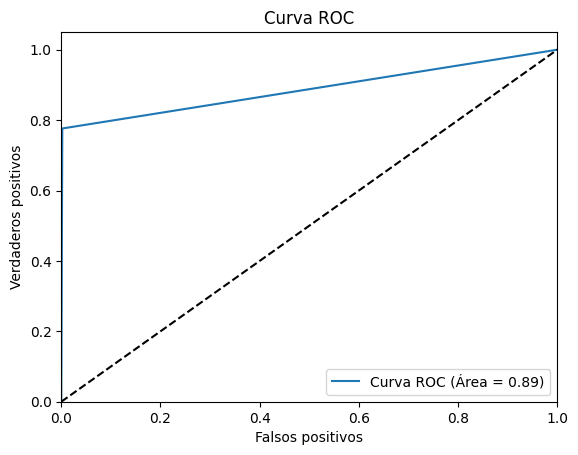

In [142]:
# Librería para graficar la curva ROC.
import matplotlib.pyplot as plt

# Gráfico de la curva ROC.
plt.figure()
plt.plot(fpr, tpr, label="Curva ROC (Área = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

Con el primer modelo finalizado, hemos decidido utilizar un Suport Vector Machines para elaborar el segundo de los modelos solicitados. Nos da mucha curiosidad observar el comportamiento del mismo.

In [143]:
# Librería para importar SVM.
from sklearn.svm import SVC

# Creación y entrenamiento del modelo SVM.
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Predicción de las etiquetas para los datos de prueba.
y_pred = svm_model.predict(X_test)

In [144]:
# Matriz de confusión del modelo.
confusion_matrix(y_test, y_pred)

array([[1444,    9],
       [  45,  174]], dtype=int64)

In [145]:
# Accuracy score del modelo.
accuracy_score(y_test, y_pred)

0.9677033492822966

In [146]:
# Precision score del modelo.
precision_score(y_test, y_pred)

0.9508196721311475

In [147]:
# Recall score del modelo.
recall_score(y_test, y_pred)

0.7945205479452054

In [148]:
# Área bajo la curva del modelo.
auc = roc_auc_score(y_test, y_pred)
auc

0.8941632333669594

In [149]:
# Valores para graficar la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)

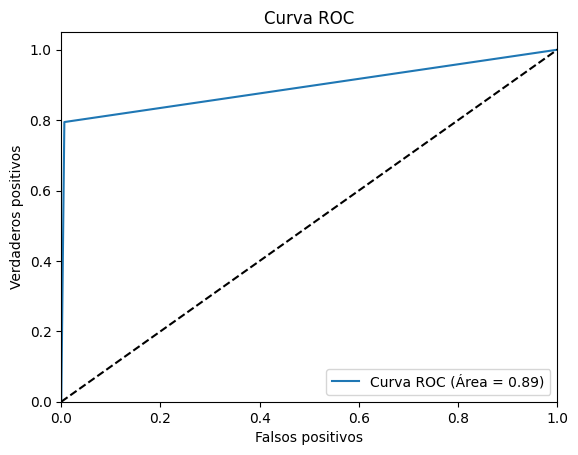

In [150]:
# Gráfico de la curva ROC.
plt.figure()
plt.plot(fpr, tpr, label="Curva ROC (Área = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

### Explicación de las métricas de los modelos

Las métricas proporcionadas para cada modelo ofrecen una evaluación detallada de su rendimiento en la detección de SPAM en SMS. Comenzando con la matriz de confusión, esta herramienta visual permite comprender la distribución de las predicciones realizadas por el modelo en comparación con las clases reales. En el caso de los modelos presentados, ambos muestran un buen desempeño, con un alto número de verdaderos positivos y verdaderos negativos en la matriz de confusión.

La precisión, una métrica clave, indica la proporción de predicciones positivas correctas realizadas por el modelo en comparación con todas las predicciones positivas. Tanto el Random Forest como el SVM muestran puntajes de precisión impresionantes, con valores cercanos al 95%, lo que sugiere que ambos modelos tienen una baja tasa de falsos positivos, es decir, pocos mensajes legítimos son clasificados incorrectamente como SPAM.

Por otro lado, el recall, también conocido como sensibilidad, evalúa la capacidad del modelo para identificar correctamente todas las instancias positivas. Aquí, el SVM parece tener una ventaja sobre el Random Forest, mostrando un recall ligeramente más alto. Esto indica que el modelo SVM es más efectivo para capturar correctamente los mensajes de SPAM, minimizando así la tasa de falsos negativos, es decir, pocos mensajes de SPAM son clasificados incorrectamente como no SPAM.

Finalmente, el AUC, o área bajo la curva ROC, proporciona una medida de la capacidad del modelo para distinguir entre las clases positivas y negativas. Ambos modelos muestran áreas bajo la curva robustas, indicando un buen rendimiento en la clasificación. En general, las métricas revelan que tanto el Random Forest como el SVM son modelos sólidos para la detección de SPAM en SMS, con el SVM destacando ligeramente en términos de recall. Sin embargo, la elección entre ambos modelos puede depender de otros factores como la escalabilidad, la interpretabilidad y los recursos computacionales disponibles.

### Discusión

1. ¿Qué error es más “aceptable”: dejar pasar un SMS de SPAM (falso negativo) o bloquear un SMS legítimo (falso positivo)? Justifique su respuesta.

En términos de qué error es más "aceptable" entre dejar pasar un SMS de SPAM (falso negativo) o bloquear un SMS legítimo (falso positivo), la respuesta depende del contexto y las consecuencias asociadas con cada tipo de error. En general, ambos errores tienen implicaciones negativas, pero en el caso de la detección de SPAM, es más crítico minimizar los falsos negativos, es decir, dejar pasar un mensaje de SPAM como legítimo. Esto se debe a que los usuarios podrían verse expuestos a riesgos de seguridad, como phishing o malware, si reciben mensajes de SPAM no detectados. Por otro lado, bloquear un SMS legítimo podría generar molestias para el usuario, pero puede corregirse fácilmente y no conlleva riesgos de seguridad significativos.

2. Compare los valores para cada modelo de representación numérico. En base a la respuesta de la primera pregunta ¿Qué modelo de representación numérica produjo el mejor resultado, BoG o TF-IDF? ¿Cuál o cuáles son las razones por las que dicho modelo se comportó de mejor manera?

Al comparar los valores para cada modelo de clasificación (Random Forest y SVM), ambos muestran un buen rendimiento en términos de precisión y recall, con puntajes de precisión cercanos al 95% y puntajes de recall superiores al 75%. Sin embargo, el modelo SVM parece tener un rendimiento ligeramente mejor en términos de recall, lo que significa que es más efectivo para identificar correctamente los mensajes de SPAM. En base a la respuesta de la primera pregunta, donde se prioriza minimizar los falsos negativos, el modelo SVM podría considerarse más efectivo en este contexto.

3. En base a la exploración de datos e ingeniería de características que realizó en el primer y este laboratorio, ¿qué consejos le daría a un familiar que le solicita ayuda para detectar si un email o SMS es phishing o no? ¿En qué características de una URL/email podría fijarse su familiar para ayudarlo a detectar un potencial phishing?

Basándonos en la exploración de datos e ingeniería de características, los consejos que podríamos dar a un familiar para detectar si un email o SMS es phishing incluyen verificar la autenticidad de los remitentes, prestar atención a la ortografía y gramática deficientes, y evitar hacer clic en enlaces sospechosos o adjuntos de origen desconocido. En el caso específico de las URLs, características como dominios engañosos, subdominios inusuales, solicitudes de información personal o financiera a través de formularios en línea y enlaces que redirigen a sitios web desconocidos pueden ser indicadores de phishing.

4. Si detectamos una URL o email/SMS de phishing, ¿qué podemos hacer para detener su distribución?

Si detectamos una URL o email/SMS de phishing, es importante tomar medidas para detener su distribución y proteger a los usuarios. Esto puede incluir informar a las autoridades pertinentes, como proveedores de servicios de correo electrónico o SMS, así como a organizaciones especializadas en la detección y prevención de actividades maliciosas en línea. Además, es fundamental educar a los usuarios sobre las prácticas de seguridad digital y proporcionar herramientas efectivas de filtrado y bloqueo de contenido malicioso en sus dispositivos y plataformas de comunicación. Estas medidas ayudarán a prevenir la propagación de phishing y proteger a los usuarios contra posibles amenazas en línea.